# This is Rene's and my final project of the Data-Science Bootcamp at WBS Coding School

The main goal of our work is to use data of gas consumption and gas prices from the past 10 years (2012 - 2021) to predict consumption and prices for 2022, as if the Ukraine war would have not happened.
We will compare this predicted data to the actual data (01 - 08/2022) to show the effects of the war on the consumption and the prices
As the last step, we will predict gas consumption and prices based on the current data (01 - 08/2022) with diffent scenarios of the gas suplly by Russia.

In [944]:
#import some libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Data processing and data cleaning for Consumption

In [945]:
#reading for training data
data_con_train = pd.read_csv("Gas Storage Europe_2022-01-01 to 2022-07-31.csv")
pd.options.display.float_format = "{:.3f}".format

In [946]:
data_con_train

,"Gas Day Start;""Gas in storage (TWh)"";""Full (%)"";""Trend (%)"";""Injection (GWh/d)"";""Withdrawal (GWh/d)"";""Working gas volume (TWh)"";""Injection capacity (GWh/d)"";""Withdrawal capacity (GWh/d)"""
0,"2022-07-31;""769.8915"";""69.3"";""0.43"";""4970.88"";..."
1,"2022-07-30;""765.6928"";""68.92"";""0.42"";""4777.75""..."
2,"2022-07-29;""761.0635"";""68.5"";""0.34"";""4075.33"";..."
3,"2022-07-28;""757.3425"";""68.17"";""0.35"";""4214.27""..."
4,"2022-07-27;""753.5066"";""67.82"";""0.35"";""4294.84""..."
...,...
207,"2022-01-05;""588.5382"";""52.99"";""-0.39"";""565.01""..."
208,"2022-01-04;""592.7334"";""53.36"";""-0.25"";""1131.49..."
209,"2022-01-03;""595.5332"";""53.61"";""-0.15"";""1572.83..."
210,"2022-01-02;""597.0875"";""53.76"";""-0.01"";""2303.97..."


In [947]:
data_con_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Data columns (total 1 columns):
 #   Column                                                                                                                                                                                      Non-Null Count  Dtype 
---  ------                                                                                                                                                                                      --------------  ----- 
 0   Gas Day Start;"Gas in storage (TWh)";"Full (%)";"Trend (%)";"Injection (GWh/d)";"Withdrawal (GWh/d)";"Working gas volume (TWh)";"Injection capacity (GWh/d)";"Withdrawal capacity (GWh/d)"  212 non-null    object
dtypes: object(1)
memory usage: 1.8+ KB


In [948]:
# renaming column with index 2
data_con_train.rename(columns={data_con_train.columns[0]: "dump"},inplace=True)
data_con_train.head()

,dump
0,"2022-07-31;""769.8915"";""69.3"";""0.43"";""4970.88"";..."
1,"2022-07-30;""765.6928"";""68.92"";""0.42"";""4777.75""..."
2,"2022-07-29;""761.0635"";""68.5"";""0.34"";""4075.33"";..."
3,"2022-07-28;""757.3425"";""68.17"";""0.35"";""4214.27""..."
4,"2022-07-27;""753.5066"";""67.82"";""0.35"";""4294.84""..."


In [949]:
# splitting values in column into new columns
data_new = data_con_train.dump.str.split(";", expand=True)
data_new.head()

,0,1,2,3,4,5,6,7,8
0,2022-07-31,"""769.8915""","""69.3""","""0.43""","""4970.88""","""153.6""","""1110.9976""","""11699.6""","""19864.19"""
1,2022-07-30,"""765.6928""","""68.92""","""0.42""","""4777.75""","""148.7""","""1110.9976""","""11699.89""","""19863.42"""
2,2022-07-29,"""761.0635""","""68.5""","""0.34""","""4075.33""","""352.7""","""1110.9976""","""11682.81""","""19863.19"""
3,2022-07-28,"""757.3425""","""68.17""","""0.35""","""4214.27""","""371.9""","""1110.9976""","""11682.91""","""19862.95"""
4,2022-07-27,"""753.5066""","""67.82""","""0.35""","""4294.84""","""431.4""","""1110.9976""","""11682.91""","""19862.94"""


In [950]:
# concatenating the newly created columns witht the original df
data_con_train = pd.concat([data_con_train, data_new], axis=1)

# renaming the columns
data_con_train.columns = ["dump","Gas Day Start", "Gas in storage (TWh)", "Full (%)", "Trend (%)", "Injection (GWh/d)", 
                            "Withdrawal (GWh/d)", "Working gas volume (TWh)", "Injection capacity (GWh/d)", "Withdrawal capacity (GWh/d)"]


# dropping unwanted columns
data_con_train.drop(columns=["dump"], inplace=True)

# final df
data_con_train.head()

,Gas Day Start,Gas in storage (TWh),Full (%),Trend (%),Injection (GWh/d),Withdrawal (GWh/d),Working gas volume (TWh),Injection capacity (GWh/d),Withdrawal capacity (GWh/d)
0,2022-07-31,"""769.8915""","""69.3""","""0.43""","""4970.88""","""153.6""","""1110.9976""","""11699.6""","""19864.19"""
1,2022-07-30,"""765.6928""","""68.92""","""0.42""","""4777.75""","""148.7""","""1110.9976""","""11699.89""","""19863.42"""
2,2022-07-29,"""761.0635""","""68.5""","""0.34""","""4075.33""","""352.7""","""1110.9976""","""11682.81""","""19863.19"""
3,2022-07-28,"""757.3425""","""68.17""","""0.35""","""4214.27""","""371.9""","""1110.9976""","""11682.91""","""19862.95"""
4,2022-07-27,"""753.5066""","""67.82""","""0.35""","""4294.84""","""431.4""","""1110.9976""","""11682.91""","""19862.94"""


In [951]:
#removing "" 
data_con_train = data_con_train.replace(regex=r'"', value = "")
data_con_train.head()

,Gas Day Start,Gas in storage (TWh),Full (%),Trend (%),Injection (GWh/d),Withdrawal (GWh/d),Working gas volume (TWh),Injection capacity (GWh/d),Withdrawal capacity (GWh/d)
0,2022-07-31,769.8915,69.3,0.43,4970.88,153.6,1110.9976,11699.6,19864.19
1,2022-07-30,765.6928,68.92,0.42,4777.75,148.7,1110.9976,11699.89,19863.42
2,2022-07-29,761.0635,68.5,0.34,4075.33,352.7,1110.9976,11682.81,19863.19
3,2022-07-28,757.3425,68.17,0.35,4214.27,371.9,1110.9976,11682.91,19862.95
4,2022-07-27,753.5066,67.82,0.35,4294.84,431.4,1110.9976,11682.91,19862.94


In [952]:
#checking for null values
data_con_train.isnull().sum()

Gas Day Start                  0
Gas in storage (TWh)           0
Full (%)                       0
Trend (%)                      0
Injection (GWh/d)              0
Withdrawal (GWh/d)             0
Working gas volume (TWh)       0
Injection capacity (GWh/d)     0
Withdrawal capacity (GWh/d)    0
dtype: int64

In [953]:
# changing datatype of prices into float

data_con_train[["Gas in storage (TWh)", "Full (%)","Trend (%)", "Injection (GWh/d)",
                  "Withdrawal (GWh/d)", "Working gas volume (TWh)", "Injection capacity (GWh/d)",
                  "Withdrawal capacity (GWh/d)"]] = data_con_train[["Gas in storage (TWh)", 
                                                                      "Full (%)", "Trend (%)", "Injection (GWh/d)", 
                                                                      "Withdrawal (GWh/d)", "Working gas volume (TWh)", 
                                                                      "Injection capacity (GWh/d)", "Withdrawal capacity (GWh/d)"]].apply(pd.to_numeric)

data_con_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Gas Day Start                212 non-null    object 
 1   Gas in storage (TWh)         212 non-null    float64
 2   Full (%)                     212 non-null    float64
 3   Trend (%)                    212 non-null    float64
 4   Injection (GWh/d)            212 non-null    float64
 5   Withdrawal (GWh/d)           212 non-null    float64
 6   Working gas volume (TWh)     212 non-null    float64
 7   Injection capacity (GWh/d)   212 non-null    float64
 8   Withdrawal capacity (GWh/d)  212 non-null    float64
dtypes: float64(8), object(1)
memory usage: 15.0+ KB


In [954]:
#changing datatypes into date time
data_con_train['Gas Day Start'] = pd.to_datetime(data_con_train['Gas Day Start'])


#ploting graph

sns.lineplot( x = "month",
             y = "Withdrawal (GWh/d)",
             hue = "year",
             data = dataframe);

sns.set(rc={'figure.figsize':(20.7,8.27)})


sns.relplot(data=data_con_train, x="Gas Day Start", y="Withdrawal (GWh/d)", kind="line")

sns.barplot(x = "year",
             y = "Withdrawal (GWh/d)",
             
             data = dataframe);

sns.lineplot(data=dataframe)

#to see correlation between them
corr_matrix = data_con_train.corr().abs()
corr_matrix

plt.matshow(data_con_train.corr())
plt.show()

In [955]:
data_con_train = (
  data_con_train
    .assign(month = data_con_train['Gas Day Start'].dt.strftime('%B'),
            day = data_con_train['Gas Day Start'].dt.strftime('%d'),
            year = data_con_train['Gas Day Start'].dt.strftime('%Y'))
        
)
data_con_train


,Gas Day Start,Gas in storage (TWh),Full (%),Trend (%),Injection (GWh/d),Withdrawal (GWh/d),Working gas volume (TWh),Injection capacity (GWh/d),Withdrawal capacity (GWh/d),month,day,year
0,2022-07-31,769.891,69.300,0.430,4970.880,153.600,1110.998,11699.600,19864.190,July,31,2022
1,2022-07-30,765.693,68.920,0.420,4777.750,148.700,1110.998,11699.890,19863.420,July,30,2022
2,2022-07-29,761.063,68.500,0.340,4075.330,352.700,1110.998,11682.810,19863.190,July,29,2022
3,2022-07-28,757.342,68.170,0.350,4214.270,371.900,1110.998,11682.910,19862.950,July,28,2022
4,2022-07-27,753.507,67.820,0.350,4294.840,431.400,1110.998,11682.910,19862.940,July,27,2022
...,...,...,...,...,...,...,...,...,...,...,...,...
207,2022-01-05,588.538,52.990,-0.390,565.010,4843.600,1110.760,11263.090,19559.340,January,05,2022
208,2022-01-04,592.733,53.360,-0.250,1131.490,3961.600,1110.760,11262.910,19559.830,January,04,2022
209,2022-01-03,595.533,53.610,-0.150,1572.830,3188.200,1110.760,11263.080,19559.390,January,03,2022
210,2022-01-02,597.087,53.760,-0.010,2303.970,2377.000,1110.743,11263.030,19557.610,January,02,2022


In [956]:
#drop unwanted column
data_con_train = data_con_train.drop(columns=["Gas in storage (TWh)", "Full (%)","Trend (%)", "Injection (GWh/d)","Working gas volume (TWh)",
                                               "Injection capacity (GWh/d)", "Withdrawal capacity (GWh/d)","Gas Day Start"], axis= 1)

data_con_train

,Withdrawal (GWh/d),month,day,year
0,153.600,July,31,2022
1,148.700,July,30,2022
2,352.700,July,29,2022
3,371.900,July,28,2022
4,431.400,July,27,2022
...,...,...,...,...
207,4843.600,January,05,2022
208,3961.600,January,04,2022
209,3188.200,January,03,2022
210,2377.000,January,02,2022


In [957]:
# setting column's order
data_con_train = data_con_train[['year','month','day','Withdrawal (GWh/d)']]

data_con_train.rename(columns={data_con_train.columns[3]: "Gas Consumption"},inplace=True)
data_con_train.head()

,year,month,day,Gas Consumption
0,2022,July,31,153.600
1,2022,July,30,148.700
2,2022,July,29,352.700
3,2022,July,28,371.900
4,2022,July,27,431.400


In [958]:
# calculating the sum for gas supply by month
#data_con_train= data_con_train.groupby(["month", "year"]).agg({"Gas Consumption":"sum"}).reset_index()


In [959]:
data_con_train[["year","day","Gas Consumption"]] = data_con_train[[ "year","day","Gas Consumption"]].apply(pd.to_numeric)

data_con_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   year             212 non-null    int64  
 1   month            212 non-null    object 
 2   day              212 non-null    int64  
 3   Gas Consumption  212 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 6.8+ KB


In [960]:
data_con_train.shape

(212, 4)

# Data processing and data cleaning for Population

In [961]:
#read data for population
#pd.options.display.float_format = "{:.0f}".format
data_pop = pd.read_csv("Population(2017-2018).csv") 
data_pop.head()



,freq,unit,age,sex,geo\TIME_PERIOD\t2017 \t2018 \t2019 \t2020 \t2021
0,A,NR,TOTAL,T,AD\t: \t: \t76177 \t: \t:
1,A,NR,TOTAL,T,AL\t2876591 \t2870324 \t2862427 \t2845955 \t28...
2,A,NR,TOTAL,T,AM\t2986151 \t2972732 \t2965269 \t2959694 \t29...
3,A,NR,TOTAL,T,AT\t8772865 \t8822267 \t8858775 \t8901064 \t89...
4,A,NR,TOTAL,T,AZ\t9809981 \t9898085 \t9981457 \t10067108 \t1...


In [962]:
#drop unwanted column
data_pop = data_pop.drop(columns=['age', 'sex', 'unit', 'freq'], axis= 1)
data_pop.head()

,geo\TIME_PERIOD\t2017 \t2018 \t2019 \t2020 \t2021
0,AD\t: \t: \t76177 \t: \t:
1,AL\t2876591 \t2870324 \t2862427 \t2845955 \t28...
2,AM\t2986151 \t2972732 \t2965269 \t2959694 \t29...
3,AT\t8772865 \t8822267 \t8858775 \t8901064 \t89...
4,AZ\t9809981 \t9898085 \t9981457 \t10067108 \t1...


In [963]:
#rename the column name
data_pop.rename(columns={data_pop.columns[0]: "dump"},inplace=True)
data_pop.head()

,dump
0,AD\t: \t: \t76177 \t: \t:
1,AL\t2876591 \t2870324 \t2862427 \t2845955 \t28...
2,AM\t2986151 \t2972732 \t2965269 \t2959694 \t29...
3,AT\t8772865 \t8822267 \t8858775 \t8901064 \t89...
4,AZ\t9809981 \t9898085 \t9981457 \t10067108 \t1...


In [964]:
# splitting values in common column into new columns
data_pop_new = data_pop.dump.str.split("\t", expand=True)


In [965]:
data_pop = pd.concat([data_pop_new, data_pop], axis=1)

data_pop.head()

,0,1,2,3,4,5,dump
0,AD,:,:,76177,:,:,AD\t: \t: \t76177 \t: \t:
1,AL,2876591,2870324,2862427,2845955,2829741,AL\t2876591 \t2870324 \t2862427 \t2845955 \t28...
2,AM,2986151,2972732,2965269,2959694,2963251,AM\t2986151 \t2972732 \t2965269 \t2959694 \t29...
3,AT,8772865,8822267,8858775,8901064,8932664,AT\t8772865 \t8822267 \t8858775 \t8901064 \t89...
4,AZ,9809981,9898085,9981457,10067108,10119133,AZ\t9809981 \t9898085 \t9981457 \t10067108 \t1...


In [966]:
# renaming the columns
data_pop.columns = ['geo','2017','2018','2019','2020','2021','dump']

# dropping unwanted columns
data_pop.drop(columns=["dump"], inplace=True)

# final df
data_pop

,geo,2017,2018,2019,2020,2021
0,AD,:,:,76177,:,:
1,AL,2876591,2870324,2862427,2845955,2829741
2,AM,2986151,2972732,2965269,2959694,2963251
3,AT,8772865,8822267,8858775,8901064,8932664
4,AZ,9809981,9898085,9981457,10067108,10119133
5,BE,11351727,11398589,11455519,11522440,11554767
6,BG,7101859,7050034,7000039,6951482,6916548
7,BY,9504704,9491823,9475174,:,:
8,CH,8419550,8484130,8544527,8606033,8670300
9,CY,854802,864236,875899,888005,896007


In [967]:
# we need only summation of all country so that is EU27-2020(24) 
data_pop = data_pop.iloc[[23]]


In [968]:
#we need only year from previous table aand add new data, afterthat we are using transpose T
data_pop['2022'] = 450420000
data_pop

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_1372\1344809885.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_pop['2022'] = 450420000


,geo,2017,2018,2019,2020,2021,2022
23,EU27_2020,445534430 b,446208557 p,446446444 bep,447319916 ep,447207489 ep,450420000


In [969]:
data_pop = data_pop.T
data_pop

,23
geo,EU27_2020
2017,445534430 b
2018,446208557 p
2019,446446444 bep
2020,447319916 ep
2021,447207489 ep
2022,450420000


In [970]:
#cleaning the data such extra p and e letter
data_pop = data_pop.replace(regex=r" bep", value = "").replace(regex=r" ep", value = "").replace(regex=r" p", value = "").replace(regex=r" b", value = "")

data_pop

,23
geo,EU27_2020
2017,445534430
2018,446208557
2019,446446444
2020,447319916
2021,447207489
2022,450420000


In [971]:
data_pop = data_pop.replace(regex=r"447207489", value = "446800000")

In [972]:
#droping unwanted geo row
data_pop.drop(["geo","2017","2018","2019","2020"],axis= 0,inplace=True)

In [973]:
#set column name as Population 
data_pop.rename(columns={data_pop.columns[0]: "Population"}, inplace=True)

data_pop

,Population
2021,446800000
2022,450420000


In [974]:
#print(data_pop.set_axis([2012, 2013,2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]))

In [975]:
# for index as year
data_pop['year'] = data_pop.index
data_pop

,Population,year
2021,446800000,2021
2022,450420000,2022


In [976]:
# changing datatype of prices into float
data_pop[['Population','year']] = data_pop[['Population','year']].apply(pd.to_numeric)
data_pop.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, 2021 to 2022
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Population  2 non-null      int64
 1   year        2 non-null      int64
dtypes: int64(2)
memory usage: 48.0+ bytes


In [977]:
data_pop = pd.concat([data_pop]*12)
data_pop = data_pop.reset_index()
data_pop = data_pop.drop(data_pop.columns[0], axis = 1)
data_pop

,Population,year
0,446800000,2021
1,450420000,2022
2,446800000,2021
3,450420000,2022
4,446800000,2021
5,450420000,2022
6,446800000,2021
7,450420000,2022
8,446800000,2021
9,450420000,2022


In [978]:
data_pop = data_pop.sort_values("year")
data_pop = data_pop.reset_index()
data_pop = data_pop.drop(data_pop.columns[0], axis = 1)
data_pop

,Population,year
0,446800000,2021
1,446800000,2021
2,446800000,2021
3,446800000,2021
4,446800000,2021
5,446800000,2021
6,446800000,2021
7,446800000,2021
8,446800000,2021
9,446800000,2021


In [979]:
df_to_add = pd.DataFrame({"month":["December", "November", "October", "September", "August", "July", "June", "May", "April", "March", "February","January"],
                          "month_no" : ["12", "11", "10", "09", "08", "07", "06", "05", "04", "03", "02", "01"]})

df_to_add = pd.concat([df_to_add]*2)
df_to_add = df_to_add.reset_index()
df_to_add = df_to_add.drop(df_to_add.columns[0], axis = 1)
data_pop = pd.concat([data_pop, df_to_add], axis = 1)
data_pop


,Population,year,month,month_no
0,446800000,2021,December,12
1,446800000,2021,November,11
2,446800000,2021,October,10
3,446800000,2021,September,09
4,446800000,2021,August,08
5,446800000,2021,July,07
6,446800000,2021,June,06
7,446800000,2021,May,05
8,446800000,2021,April,04
9,446800000,2021,March,03


In [980]:
data_pop = data_pop.sort_values(["year", "month_no"])
data_pop

,Population,year,month,month_no
11,446800000,2021,January,01
10,446800000,2021,February,02
9,446800000,2021,March,03
8,446800000,2021,April,04
7,446800000,2021,May,05
6,446800000,2021,June,06
5,446800000,2021,July,07
4,446800000,2021,August,08
3,446800000,2021,September,09
2,446800000,2021,October,10


In [981]:
data_pop[["Population", "year","month_no"]] = data_pop[["Population", "year","month_no"]].apply(pd.to_numeric)

data_pop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24 entries, 11 to 12
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Population  24 non-null     int64 
 1   year        24 non-null     int64 
 2   month       24 non-null     object
 3   month_no    24 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 960.0+ bytes


In [982]:
import numpy as np
data_pop["Population"] = np.where(data_pop["month"] != "December", np.nan, data_pop["Population"])
data_pop

,Population,year,month,month_no
11,NaN,2021,January,1
10,NaN,2021,February,2
9,NaN,2021,March,3
8,NaN,2021,April,4
7,NaN,2021,May,5
6,NaN,2021,June,6
5,NaN,2021,July,7
4,NaN,2021,August,8
3,NaN,2021,September,9
2,NaN,2021,October,10


In [983]:
data_pop = data_pop.interpolate().reset_index(drop=True)
data_pop

,Population,year,month,month_no
0,NaN,2021,January,1
1,NaN,2021,February,2
2,NaN,2021,March,3
3,NaN,2021,April,4
4,NaN,2021,May,5
5,NaN,2021,June,6
6,NaN,2021,July,7
7,NaN,2021,August,8
8,NaN,2021,September,9
9,NaN,2021,October,10


In [984]:
data_pop = data_pop.drop([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,19,20,21,22,23])
data_pop = data_pop.drop(data_pop.columns[3], axis = 1)
data_pop = data_pop[["year", "month", "Population"]]
data_pop = data_pop.reset_index(drop=True)
data_pop

,year,month,Population
0,2022,January,447101666.667
1,2022,February,447403333.333
2,2022,March,447705000.000
3,2022,April,448006666.667
4,2022,May,448308333.333
5,2022,June,448610000.000
6,2022,July,448911666.667


In [985]:
data_con_train.info()
data_pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   year             212 non-null    int64  
 1   month            212 non-null    object 
 2   day              212 non-null    int64  
 3   Gas Consumption  212 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 6.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        7 non-null      int64  
 1   month       7 non-null      object 
 2   Population  7 non-null      float64
dtypes: float64(1), int64(1), object(1)
memory usage: 296.0+ bytes


In [986]:
# merging for Population and original table
data_con_train= data_con_train.merge(data_pop, how='left', on=['month','year'])
data_con_train


,year,month,day,Gas Consumption,Population
0,2022,July,31,153.600,448911666.667
1,2022,July,30,148.700,448911666.667
2,2022,July,29,352.700,448911666.667
3,2022,July,28,371.900,448911666.667
4,2022,July,27,431.400,448911666.667
...,...,...,...,...,...
207,2022,January,5,4843.600,447101666.667
208,2022,January,4,3961.600,447101666.667
209,2022,January,3,3188.200,447101666.667
210,2022,January,2,2377.000,447101666.667


# Data processing and data cleaning for GDP

In [987]:
data_original_gdp = pd.read_excel(r"Evolution of GDP worldwide since 1960.xls")
data_original_gdp.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2615083798.883,2727932960.894,2791061452.514,2963128491.620,2983798882.682,3092178770.950,3202234636.872,3310055865.922,2496648044.693,NaN
1,Africa Eastern and Southern,AFE,GDP (current US$),NY.GDP.MKTP.CD,21290586002.882,21808473824.612,23707015393.918,28210036878.097,26118787467.478,29682172751.467,...,973043454994.634,983937046710.893,1003678868706.975,924252536256.503,882355055412.759,1020647235171.217,991022252916.702,997534042075.187,921645942921.888,1082095608968.230
2,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,537777811.111,548888895.556,546666677.778,751111191.111,800000044.444,1006666637.778,...,19907317065.667,20146404996.223,20497126770.134,19134211763.859,18116562464.909,18753469630.259,18053228578.888,18799450742.782,20116137325.821,NaN
3,Africa Western and Central,AFW,GDP (current US$),NY.GDP.MKTP.CD,10404135069.150,11127894641.019,11943187848.304,12676330764.692,13838369295.231,14862225759.914,...,727570384034.451,820792700049.506,864990453538.518,760734474152.243,690546384903.295,683748746978.112,741689925173.427,794543045900.110,784445725634.786,835808395909.477
4,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,124998158417.861,133401594460.922,137244418012.553,87219290028.726,49840494025.517,68972763787.155,77792940077.119,69309104806.631,53619071176.139,72546985708.571


In [988]:
# selecting values for European Union
data_gdp_eu_20xx = data_original_gdp.set_index("Country Name")
data_gdp_eu_20xx = data_gdp_eu_20xx.loc[["European Union"]]
data_gdp_eu_20xx = data_gdp_eu_20xx.reset_index()
data_gdp_eu_20xx

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,European Union,EUU,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,14636200267663.121,15299732275660.324,15652098620138.471,13551929359932.773,13893207820569.555,14766273067392.105,15978719985091.496,15691850452107.320,15300141971364.803,17088620744318.824


<AxesSubplot:>

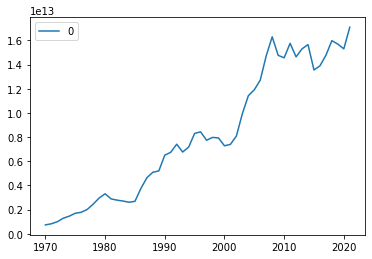

In [989]:
# drop unwanted columns to plot trend of GDP for EU
df_to_plot = data_gdp_eu_20xx.drop(data_gdp_eu_20xx.columns[[0,1,2,3]], axis = 1)
df_to_plot = df_to_plot.T
df_to_plot.plot()

<AxesSubplot:>

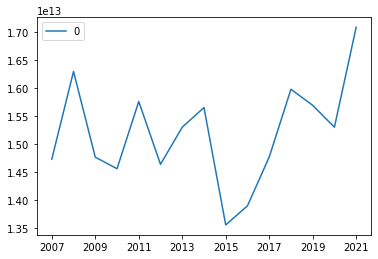

In [990]:
# plot GDP only after 2007
df_2000 = data_gdp_eu_20xx.loc[:, "2007":]
df_2000_plot = df_2000.T
df_2000_plot.plot()

In [991]:
# choose columns > 2018
data_gdp_eu_20xx = data_gdp_eu_20xx.loc[:, ["2021"]]
data_gdp_eu_20xx

,2021
0,17088620744318.824


In [992]:
# get rid of scientific notation
pd.options.display.float_format = "{:.0f}".format
data_gdp_eu_20xx

,2021
0,17088620744319


In [993]:
data_gdp_eu_20xx['2022'] = 17532924883671.119
data_gdp_eu_20xx

,2021,2022
0,17088620744319,17532924883671


In [994]:
data_gdp_eu_20xx = data_gdp_eu_20xx.T
data_gdp_eu_20xx

,0
2021,17088620744319
2022,17532924883671


In [995]:
data_gdp_eu_20xx.rename(columns={data_gdp_eu_20xx.columns[0]: "GDP"}, inplace=True)
data_gdp_eu_20xx["year"] = data_gdp_eu_20xx.index
data_gdp_eu_20xx = data_gdp_eu_20xx[["year", "GDP"]]
data_gdp_eu_20xx = data_gdp_eu_20xx.reset_index()
data_gdp_eu_20xx = data_gdp_eu_20xx.drop(data_gdp_eu_20xx.columns[0], axis = 1)
data_gdp_eu_20xx

,year,GDP
0,2021,17088620744319
1,2022,17532924883671


In [996]:
data_gdp_eu_20xx = pd.concat([data_gdp_eu_20xx]*12)
data_gdp_eu_20xx = data_gdp_eu_20xx.reset_index(drop=True)

data_gdp_eu_20xx

,year,GDP
0,2021,17088620744319
1,2022,17532924883671
2,2021,17088620744319
3,2022,17532924883671
4,2021,17088620744319
5,2022,17532924883671
6,2021,17088620744319
7,2022,17532924883671
8,2021,17088620744319
9,2022,17532924883671


In [997]:
data_gdp_eu_20xx = data_gdp_eu_20xx.sort_values("year")
data_gdp_eu_20xx = data_gdp_eu_20xx.reset_index(drop=True)

data_gdp_eu_20xx

,year,GDP
0,2021,17088620744319
1,2021,17088620744319
2,2021,17088620744319
3,2021,17088620744319
4,2021,17088620744319
5,2021,17088620744319
6,2021,17088620744319
7,2021,17088620744319
8,2021,17088620744319
9,2021,17088620744319


In [998]:
df_to_add = pd.DataFrame({"month":["December", "November", "October", "September", "August", "July", "June", "May", "April", "March", "February","January"],
                          "month_no" : ["12", "11", "10", "09", "08", "07", "06", "05", "04", "03", "02", "01"]})
df_to_add = pd.concat([df_to_add]*2)
df_to_add = df_to_add.reset_index(drop=True)

data_gdp_eu_20xx = pd.concat([data_gdp_eu_20xx, df_to_add], axis = 1)
data_gdp_eu_20xx

,year,GDP,month,month_no
0,2021,17088620744319,December,12
1,2021,17088620744319,November,11
2,2021,17088620744319,October,10
3,2021,17088620744319,September,09
4,2021,17088620744319,August,08
5,2021,17088620744319,July,07
6,2021,17088620744319,June,06
7,2021,17088620744319,May,05
8,2021,17088620744319,April,04
9,2021,17088620744319,March,03


In [999]:
data_gdp_eu_20xx = data_gdp_eu_20xx.sort_values(["year", "month_no"])
data_gdp_eu_20xx

,year,GDP,month,month_no
11,2021,17088620744319,January,01
10,2021,17088620744319,February,02
9,2021,17088620744319,March,03
8,2021,17088620744319,April,04
7,2021,17088620744319,May,05
6,2021,17088620744319,June,06
5,2021,17088620744319,July,07
4,2021,17088620744319,August,08
3,2021,17088620744319,September,09
2,2021,17088620744319,October,10


In [1000]:
import numpy as np
data_gdp_eu_20xx["GDP"] = np.where(data_gdp_eu_20xx["month"] != "December", np.nan, data_gdp_eu_20xx["GDP"])
data_gdp_eu_20xx

,year,GDP,month,month_no
11,2021,NaN,January,01
10,2021,NaN,February,02
9,2021,NaN,March,03
8,2021,NaN,April,04
7,2021,NaN,May,05
6,2021,NaN,June,06
5,2021,NaN,July,07
4,2021,NaN,August,08
3,2021,NaN,September,09
2,2021,NaN,October,10


In [1001]:
data_gdp_eu_20xx = data_gdp_eu_20xx.interpolate().reset_index(drop=True)
data_gdp_eu_20xx

,year,GDP,month,month_no
0,2021,NaN,January,01
1,2021,NaN,February,02
2,2021,NaN,March,03
3,2021,NaN,April,04
4,2021,NaN,May,05
5,2021,NaN,June,06
6,2021,NaN,July,07
7,2021,NaN,August,08
8,2021,NaN,September,09
9,2021,NaN,October,10


In [1002]:
data_gdp_eu_20xx = data_gdp_eu_20xx.drop([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,19,20,21,22,23])
data_gdp_eu_20xx = data_gdp_eu_20xx.drop(data_gdp_eu_20xx.columns[3], axis = 1)
data_gdp_eu_20xx = data_gdp_eu_20xx[["year", "month", "GDP"]]
data_gdp_eu_20xx = data_gdp_eu_20xx.reset_index(drop=True)
data_gdp_eu_20xx

,year,month,GDP
0,2022,January,17125646089265
1,2022,February,17162671434211
2,2022,March,17199696779157
3,2022,April,17236722124103
4,2022,May,17273747469049
5,2022,June,17310772813995
6,2022,July,17347798158941


In [1003]:
data_gdp_eu_20xx[["GDP", "year"]] = data_gdp_eu_20xx[["GDP","year"]].apply(pd.to_numeric)

data_pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        7 non-null      int64  
 1   month       7 non-null      object 
 2   Population  7 non-null      float64
dtypes: float64(1), int64(1), object(1)
memory usage: 296.0+ bytes


In [1004]:
# merging for Population and original table
data_con_train= data_con_train.merge(data_gdp_eu_20xx, how='left', on=['year','month'])

data_con_train.head(35)

,year,month,day,Gas Consumption,Population,GDP
0,2022,July,31,154,448911667,17347798158941
1,2022,July,30,149,448911667,17347798158941
2,2022,July,29,353,448911667,17347798158941
3,2022,July,28,372,448911667,17347798158941
4,2022,July,27,431,448911667,17347798158941
5,2022,July,26,276,448911667,17347798158941
6,2022,July,25,218,448911667,17347798158941
7,2022,July,24,81,448911667,17347798158941
8,2022,July,23,160,448911667,17347798158941
9,2022,July,22,503,448911667,17347798158941


# Data processing and cleaning for Renewable engery

In [1005]:
data_original_ren = pd.read_csv(r"nrg_ind_ren_page_tabular.csv")
pd.options.display.float_format = "{:.3f}".format


In [1006]:
data_ren = data_original_ren.drop(data_original_ren.columns[[0, 1]],axis = 1)
data_ren.head()

,unit,geo\TIME_PERIOD\t2011 \t2012 \t2013 \t2014 \t2015 \t2016 \t2017 \t2018 \t2019 \t2020
0,PC,AL\t31.187 \t35.152 \t33.167 \t31.856 \t34.913...
1,PC,AT\t31.552 \t32.734 \t32.665 \t33.550 \t33.498...
2,PC,BA\t17.995 \t18.014 \t19.307 \t24.873 \t26.607...
3,PC,BE\t6.302 \t7.086 \t7.671 \t8.038 \t8.060 \t8....
4,PC,BG\t14.152 \t15.837 \t18.898 \t18.050 \t18.261...


In [1007]:
# renaming column with index 1
data_ren.rename(columns={data_ren.columns[1]: "dump"},inplace=True)
data_ren.head()

,unit,dump
0,PC,AL\t31.187 \t35.152 \t33.167 \t31.856 \t34.913...
1,PC,AT\t31.552 \t32.734 \t32.665 \t33.550 \t33.498...
2,PC,BA\t17.995 \t18.014 \t19.307 \t24.873 \t26.607...
3,PC,BE\t6.302 \t7.086 \t7.671 \t8.038 \t8.060 \t8....
4,PC,BG\t14.152 \t15.837 \t18.898 \t18.050 \t18.261...


In [1008]:
# splitting values in column "geo" into new columns
data_new_columns = data_ren.dump.str.split("\t", expand=True)
data_new_columns.head()

,0,1,2,3,4,5,6,7,8,9,10
0,AL,31.187,35.152,33.167,31.856,34.913,36.953,35.777,36.572,38.042,45.015
1,AT,31.552,32.734,32.665,33.550,33.498,33.370,33.137,33.784,33.755,36.545
2,BA,17.995,18.014,19.307,24.873,26.607,25.358,23.241,35.972,37.578,:
3,BE,6.302,7.086,7.671,8.038,8.060,8.744,9.136,9.472,9.929,13.000
4,BG,14.152,15.837,18.898,18.050,18.261,18.760,18.695,20.581,21.546,23.319


In [1009]:
# concatenating the newly created columns with the original df
data_ren = pd.concat([data_ren, data_new_columns], axis=1)

# renaming the columns
data_ren.columns = ["unit", "dump", "geo", "2011", "2012", "2013", 
                    "2014", "2015", "2016", "2017", "2018", 
                    "2019", "2020"]

# dropping unwanted columns
data_ren.drop(columns=["dump", "2011", "2012", "2013", "2014", "2015", "2016"], inplace=True)

# final df
data_ren.head()

,unit,geo,2017,2018,2019,2020
0,PC,AL,35.777,36.572,38.042,45.015
1,PC,AT,33.137,33.784,33.755,36.545
2,PC,BA,23.241,35.972,37.578,:
3,PC,BE,9.136,9.472,9.929,13.000
4,PC,BG,18.695,20.581,21.546,23.319


In [1010]:
# replace ":"-values with 0.0
data_ren = data_ren.replace(regex=r":", value = 0.0)
data_ren.head()

,unit,geo,2017,2018,2019,2020
0,PC,AL,35.777,36.572,38.042,45.015
1,PC,AT,33.137,33.784,33.755,36.545
2,PC,BA,23.241,35.972,37.578,0.000
3,PC,BE,9.136,9.472,9.929,13.000
4,PC,BG,18.695,20.581,21.546,23.319


In [1011]:
# changing datatype of prices into float
data_ren[["2017","2018", "2019", "2020"]] = data_ren[["2017","2018", "2019","2020"]].apply(pd.to_numeric)
data_ren.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   unit    39 non-null     object 
 1   geo     39 non-null     object 
 2   2017    39 non-null     float64
 3   2018    39 non-null     float64
 4   2019    39 non-null     float64
 5   2020    39 non-null     float64
dtypes: float64(4), object(2)
memory usage: 2.0+ KB


In [1012]:
# selecting values for European Union
data_ren_eu = data_ren.set_index("geo")
data_ren_eu = data_ren_eu.loc[["EU27_2020"]]
data_ren_eu = data_ren_eu.reset_index()
data_ren_eu

,geo,unit,2017,2018,2019,2020
0,EU27_2020,PC,18.412,19.096,19.885,22.090


In [1013]:
# inserting data for 2021 (assumption that EU will reach their target in 2021, just as they did in 2020)
data_ren[["2021"]] = data_ren[["2020"]].apply(pd.to_numeric)
data_ren_eu["2021"] = 23.08
data_ren_eu["2022"] =24.070
data_ren_eu

,geo,unit,2017,2018,2019,2020,2021,2022
0,EU27_2020,PC,18.412,19.096,19.885,22.090,23.080,24.070


In [1014]:
df_ren = data_ren_eu.drop(data_ren_eu.columns[[0, 1,2,3,4,5]],axis = 1)
df_ren = df_ren.T
df_ren

,0
2021,23.080
2022,24.070


In [1015]:
df_ren.rename(columns={df_ren.columns[0]: "Renewable_energy"}, inplace=True)
df_ren["year"] = df_ren.index
df_ren = df_ren.reset_index(drop=True)
df_ren

,Renewable_energy,year
0,23.080,2021
1,24.070,2022


In [1016]:
df_ren = pd.concat([df_ren]*12)
df_ren = df_ren.reset_index(drop=True)
df_ren

,Renewable_energy,year
0,23.080,2021
1,24.070,2022
2,23.080,2021
3,24.070,2022
4,23.080,2021
5,24.070,2022
6,23.080,2021
7,24.070,2022
8,23.080,2021
9,24.070,2022


In [1017]:
df_ren = df_ren.sort_values("year")
df_ren = df_ren.reset_index(drop=True)
df_ren

,Renewable_energy,year
0,23.080,2021
1,23.080,2021
2,23.080,2021
3,23.080,2021
4,23.080,2021
5,23.080,2021
6,23.080,2021
7,23.080,2021
8,23.080,2021
9,23.080,2021


In [1018]:
df_to_add = pd.DataFrame({"month":["December", "November", "October", "September", "August", "July", "June", "May", "April", "March", "February","January"],
                          "month_no" : ["12", "11", "10", "09", "08", "07", "06", "05", "04", "03", "02", "01"]})
df_to_add = pd.concat([df_to_add]*2)
df_to_add = df_to_add.reset_index(drop=True)

df_ren = pd.concat([df_ren, df_to_add], axis = 1)
df_ren

,Renewable_energy,year,month,month_no
0,23.080,2021,December,12
1,23.080,2021,November,11
2,23.080,2021,October,10
3,23.080,2021,September,09
4,23.080,2021,August,08
5,23.080,2021,July,07
6,23.080,2021,June,06
7,23.080,2021,May,05
8,23.080,2021,April,04
9,23.080,2021,March,03


In [1019]:
df_ren = df_ren.sort_values(["year", "month_no"])
df_ren

,Renewable_energy,year,month,month_no
11,23.080,2021,January,01
10,23.080,2021,February,02
9,23.080,2021,March,03
8,23.080,2021,April,04
7,23.080,2021,May,05
6,23.080,2021,June,06
5,23.080,2021,July,07
4,23.080,2021,August,08
3,23.080,2021,September,09
2,23.080,2021,October,10


In [1020]:
df_ren[["ren_perc", "year", "month_no"]] = df_ren[["Renewable_energy", "year", "month_no"]].apply(pd.to_numeric)
df_ren.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24 entries, 11 to 12
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Renewable_energy  24 non-null     float64
 1   year              24 non-null     int64  
 2   month             24 non-null     object 
 3   month_no          24 non-null     int64  
 4   ren_perc          24 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 1.1+ KB


In [1021]:
import numpy as np
df_ren["Renewable_energy"] = np.where(df_ren["month"] != "December", np.nan, df_ren["Renewable_energy"])
df_ren

,Renewable_energy,year,month,month_no,ren_perc
11,NaN,2021,January,1,23.080
10,NaN,2021,February,2,23.080
9,NaN,2021,March,3,23.080
8,NaN,2021,April,4,23.080
7,NaN,2021,May,5,23.080
6,NaN,2021,June,6,23.080
5,NaN,2021,July,7,23.080
4,NaN,2021,August,8,23.080
3,NaN,2021,September,9,23.080
2,NaN,2021,October,10,23.080


In [1022]:
df_ren = df_ren.interpolate().reset_index(drop=True)
df_ren

,Renewable_energy,year,month,month_no,ren_perc
0,NaN,2021,January,1,23.080
1,NaN,2021,February,2,23.080
2,NaN,2021,March,3,23.080
3,NaN,2021,April,4,23.080
4,NaN,2021,May,5,23.080
5,NaN,2021,June,6,23.080
6,NaN,2021,July,7,23.080
7,NaN,2021,August,8,23.080
8,NaN,2021,September,9,23.080
9,NaN,2021,October,10,23.080


In [1023]:
df_ren = df_ren.drop([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,19,20,21,22,23])
df_ren = df_ren.drop(df_ren.columns[3], axis = 1)
df_ren = df_ren[["year", "month", "Renewable_energy"]]
df_ren = df_ren.reset_index(drop=True)
df_ren

,year,month,Renewable_energy
0,2022,January,23.162
1,2022,February,23.245
2,2022,March,23.328
3,2022,April,23.410
4,2022,May,23.492
5,2022,June,23.575
6,2022,July,23.657


In [1024]:
# merging for Population and original table
data_con_train= data_con_train.merge(df_ren, how='left', on=['year','month'])

data_con_train

,year,month,day,Gas Consumption,Population,GDP,Renewable_energy
0,2022,July,31,153.600,448911666.667,17347798158940.996,23.657
1,2022,July,30,148.700,448911666.667,17347798158940.996,23.657
2,2022,July,29,352.700,448911666.667,17347798158940.996,23.657
3,2022,July,28,371.900,448911666.667,17347798158940.996,23.657
4,2022,July,27,431.400,448911666.667,17347798158940.996,23.657
...,...,...,...,...,...,...,...
207,2022,January,5,4843.600,447101666.667,17125646089264.850,23.162
208,2022,January,4,3961.600,447101666.667,17125646089264.850,23.162
209,2022,January,3,3188.200,447101666.667,17125646089264.850,23.162
210,2022,January,2,2377.000,447101666.667,17125646089264.850,23.162


# Data processing and data cleaning for Price

In [1025]:
data_original_20xx = pd.read_csv(r"Dutch TTF Natural Gas Futures 01-07_2022.csv")

data_original_20xx.head()

,Datum,Zuletzt,Eröffn.,Hoch,Tief,Vol.,+/- %
0,29. Juli 2022,"192,375","192,375","192,375","192,375",NaN,"-3,98%"
1,28. Juli 2022,"200,350","200,350","200,350","200,350",NaN,"-3,21%"
2,27. Juli 2022,"206,985","206,985","206,985","206,985",NaN,"2,01%"
3,26. Juli 2022,"202,910","202,910","202,910","202,910",NaN,"12,79%"
4,25. Juli 2022,"179,900","179,900","179,900","179,900",NaN,"10,00%"


In [1026]:
data_original_20xx.shape

(146, 7)

In [1027]:
# replace german with english column name
#data_original.rename(columns={data_original.columns[0]: "Date"}, inplace=True)


In [1028]:
#drop unwanted columns
data_price_20xx = data_original_20xx.drop(data_original_20xx.columns[2:7],axis = 1)
data_price_20xx.head()

,Datum,Zuletzt
0,29. Juli 2022,"192,375"
1,28. Juli 2022,"200,350"
2,27. Juli 2022,"206,985"
3,26. Juli 2022,"202,910"
4,25. Juli 2022,"179,900"


In [1029]:
# replace german with english words and bad characters
data_price_20xx = (data_price_20xx.replace(regex=r"Dez", value = "Dec")
                   .replace(regex=r"Okt", value = "Oct")
                   .replace(regex=r"Sept", value = "Sep")
                   .replace(regex=r"Juli", value = "Jul.")
                   .replace(regex=r"Juni", value = "Jun.")
                   .replace(regex=r"Mai", value = "May.")
                   .replace(regex=r"März", value = "Mar.")
                   .replace(regex=r". ", value = "-")
                   .replace(regex=r",", value = ".")
)

data_price_20xx.head()

,Datum,Zuletzt
0,29-Jul-2022,192.375
1,28-Jul-2022,200.350
2,27-Jul-2022,206.985
3,26-Jul-2022,202.910
4,25-Jul-2022,179.900


In [1030]:
# convert Date into datetime-datatype
data_price_20xx["Datum"] = pd.to_datetime(data_price_20xx["Datum"])
data_price_20xx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Datum    146 non-null    datetime64[ns]
 1   Zuletzt  146 non-null    object        
dtypes: datetime64[ns](1), object(1)
memory usage: 2.4+ KB


In [1031]:
# change "Zuletzt"-datatype into float
#data_price_20xx["Zuletzt"] = pd.to_numeric(data_price_20xx["Zuletzt"])

data_price_20xx["Zuletzt"]= data_price_20xx["Zuletzt"].astype(np.float64)
data_price_20xx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Datum    146 non-null    datetime64[ns]
 1   Zuletzt  146 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.4 KB


In [1032]:
data_price_20xx = data_price_20xx.assign(day = data_price_20xx["Datum"].dt.strftime("%d"),
                                         month = data_price_20xx["Datum"].dt.strftime("%B"),
                                         month_no =  data_price_20xx["Datum"].dt.strftime("%m"),
                                         year = data_price_20xx["Datum"].dt.strftime("%Y")
                                         )
                                         
data_price_20xx.head()                          

,Datum,Zuletzt,day,month,month_no,year
0,2022-07-29,192.375,29,July,07,2022
1,2022-07-28,200.350,28,July,07,2022
2,2022-07-27,206.985,27,July,07,2022
3,2022-07-26,202.910,26,July,07,2022
4,2022-07-25,179.900,25,July,07,2022


In [1033]:
# drop unwanted columns
data_price_20xx = data_price_20xx.drop(data_price_20xx.columns[[0,4]], axis=1)
data_price_20xx

,Zuletzt,day,month,year
0,192.375,29,July,2022
1,200.350,28,July,2022
2,206.985,27,July,2022
3,202.910,26,July,2022
4,179.900,25,July,2022
...,...,...,...,...
141,79.560,07,January,2022
142,86.560,06,January,2022
143,82.940,05,January,2022
144,80.530,04,January,2022


In [1034]:
# rename column "Zuletzt"
data_price_20xx.rename(columns={data_price_20xx.columns[0]: "Price"}, inplace=True)
data_price_20xx.rename(columns={data_price_20xx.columns[2]: "month"}, inplace=True)
data_price_20xx

,Price,day,month,year
0,192.375,29,July,2022
1,200.350,28,July,2022
2,206.985,27,July,2022
3,202.910,26,July,2022
4,179.900,25,July,2022
...,...,...,...,...
141,79.560,07,January,2022
142,86.560,06,January,2022
143,82.940,05,January,2022
144,80.530,04,January,2022


In [1035]:
data_con_train

,year,month,day,Gas Consumption,Population,GDP,Renewable_energy
0,2022,July,31,153.600,448911666.667,17347798158940.996,23.657
1,2022,July,30,148.700,448911666.667,17347798158940.996,23.657
2,2022,July,29,352.700,448911666.667,17347798158940.996,23.657
3,2022,July,28,371.900,448911666.667,17347798158940.996,23.657
4,2022,July,27,431.400,448911666.667,17347798158940.996,23.657
...,...,...,...,...,...,...,...
207,2022,January,5,4843.600,447101666.667,17125646089264.850,23.162
208,2022,January,4,3961.600,447101666.667,17125646089264.850,23.162
209,2022,January,3,3188.200,447101666.667,17125646089264.850,23.162
210,2022,January,2,2377.000,447101666.667,17125646089264.850,23.162


In [1036]:
data_price_20xx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   146 non-null    float64
 1   day     146 non-null    object 
 2   month   146 non-null    object 
 3   year    146 non-null    object 
dtypes: float64(1), object(3)
memory usage: 4.7+ KB


In [1037]:
# changing datatype of prices into float
data_price_20xx[['Price','year','day']] = data_price_20xx[['Price','year','day']].apply(pd.to_numeric)
data_price_20xx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   146 non-null    float64
 1   day     146 non-null    int64  
 2   month   146 non-null    object 
 3   year    146 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 4.7+ KB


In [1038]:
# merging for price and original table
merged_data = data_con_train.merge(data_price_20xx, how='left', on=['month','year','day'])
merged_data.copy()

,year,month,day,Gas Consumption,Population,GDP,Renewable_energy,Price
0,2022,July,31,153.600,448911666.667,17347798158940.996,23.657,NaN
1,2022,July,30,148.700,448911666.667,17347798158940.996,23.657,NaN
2,2022,July,29,352.700,448911666.667,17347798158940.996,23.657,192.375
3,2022,July,28,371.900,448911666.667,17347798158940.996,23.657,200.350
4,2022,July,27,431.400,448911666.667,17347798158940.996,23.657,206.985
...,...,...,...,...,...,...,...,...
207,2022,January,5,4843.600,447101666.667,17125646089264.850,23.162,82.940
208,2022,January,4,3961.600,447101666.667,17125646089264.850,23.162,80.530
209,2022,January,3,3188.200,447101666.667,17125646089264.850,23.162,72.610
210,2022,January,2,2377.000,447101666.667,17125646089264.850,23.162,NaN


In [1039]:
merged_data.loc[len(merged_data.index)] = [2022,'August', 1, 153.600, 448911666.667, 17347798158940.996, 23.657, 210]

In [1040]:
merged_data.loc[len(merged_data.index)] = [2021,'December',31, 153.600, 448911666.667, 17347798158940.996, 23.657, 70.345]

In [1041]:
merged_data

,year,month,day,Gas Consumption,Population,GDP,Renewable_energy,Price
0,2022,July,31,153.600,448911666.667,17347798158940.996,23.657,NaN
1,2022,July,30,148.700,448911666.667,17347798158940.996,23.657,NaN
2,2022,July,29,352.700,448911666.667,17347798158940.996,23.657,192.375
3,2022,July,28,371.900,448911666.667,17347798158940.996,23.657,200.350
4,2022,July,27,431.400,448911666.667,17347798158940.996,23.657,206.985
...,...,...,...,...,...,...,...,...
209,2022,January,3,3188.200,447101666.667,17125646089264.850,23.162,72.610
210,2022,January,2,2377.000,447101666.667,17125646089264.850,23.162,NaN
211,2022,January,1,1898.400,447101666.667,17125646089264.850,23.162,NaN
212,2022,August,1,153.600,448911666.667,17347798158940.996,23.657,210.000


In [1042]:
merged_data = pd.concat([merged_data.iloc[[212],:], merged_data.drop(212, axis=0)], axis=0)
merged_data

,year,month,day,Gas Consumption,Population,GDP,Renewable_energy,Price
212,2022,August,1,153.600,448911666.667,17347798158940.996,23.657,210.000
0,2022,July,31,153.600,448911666.667,17347798158940.996,23.657,NaN
1,2022,July,30,148.700,448911666.667,17347798158940.996,23.657,NaN
2,2022,July,29,352.700,448911666.667,17347798158940.996,23.657,192.375
3,2022,July,28,371.900,448911666.667,17347798158940.996,23.657,200.350
...,...,...,...,...,...,...,...,...
208,2022,January,4,3961.600,447101666.667,17125646089264.850,23.162,80.530
209,2022,January,3,3188.200,447101666.667,17125646089264.850,23.162,72.610
210,2022,January,2,2377.000,447101666.667,17125646089264.850,23.162,NaN
211,2022,January,1,1898.400,447101666.667,17125646089264.850,23.162,NaN


In [1043]:
#merged_data.sort_values((['month']), ascending=False).reset_index(drop= True).head(35)

In [1044]:
merged_data.reset_index(drop= True)

,year,month,day,Gas Consumption,Population,GDP,Renewable_energy,Price
0,2022,August,1,153.600,448911666.667,17347798158940.996,23.657,210.000
1,2022,July,31,153.600,448911666.667,17347798158940.996,23.657,NaN
2,2022,July,30,148.700,448911666.667,17347798158940.996,23.657,NaN
3,2022,July,29,352.700,448911666.667,17347798158940.996,23.657,192.375
4,2022,July,28,371.900,448911666.667,17347798158940.996,23.657,200.350
...,...,...,...,...,...,...,...,...
209,2022,January,4,3961.600,447101666.667,17125646089264.850,23.162,80.530
210,2022,January,3,3188.200,447101666.667,17125646089264.850,23.162,72.610
211,2022,January,2,2377.000,447101666.667,17125646089264.850,23.162,NaN
212,2022,January,1,1898.400,447101666.667,17125646089264.850,23.162,NaN


In [1045]:
merged_data = merged_data.interpolate().reset_index(drop=True)
merged_data

,year,month,day,Gas Consumption,Population,GDP,Renewable_energy,Price
0,2022,August,1,153.600,448911666.667,17347798158940.996,23.657,210.000
1,2022,July,31,153.600,448911666.667,17347798158940.996,23.657,204.125
2,2022,July,30,148.700,448911666.667,17347798158940.996,23.657,198.250
3,2022,July,29,352.700,448911666.667,17347798158940.996,23.657,192.375
4,2022,July,28,371.900,448911666.667,17347798158940.996,23.657,200.350
...,...,...,...,...,...,...,...,...
209,2022,January,4,3961.600,447101666.667,17125646089264.850,23.162,80.530
210,2022,January,3,3188.200,447101666.667,17125646089264.850,23.162,72.610
211,2022,January,2,2377.000,447101666.667,17125646089264.850,23.162,71.855
212,2022,January,1,1898.400,447101666.667,17125646089264.850,23.162,71.100


In [1046]:
# drop unwanted columns
merged_data = merged_data.drop(merged_data.index[[0,213]], axis=0)

In [1047]:
merged_data

,year,month,day,Gas Consumption,Population,GDP,Renewable_energy,Price
1,2022,July,31,153.600,448911666.667,17347798158940.996,23.657,204.125
2,2022,July,30,148.700,448911666.667,17347798158940.996,23.657,198.250
3,2022,July,29,352.700,448911666.667,17347798158940.996,23.657,192.375
4,2022,July,28,371.900,448911666.667,17347798158940.996,23.657,200.350
5,2022,July,27,431.400,448911666.667,17347798158940.996,23.657,206.985
...,...,...,...,...,...,...,...,...
208,2022,January,5,4843.600,447101666.667,17125646089264.850,23.162,82.940
209,2022,January,4,3961.600,447101666.667,17125646089264.850,23.162,80.530
210,2022,January,3,3188.200,447101666.667,17125646089264.850,23.162,72.610
211,2022,January,2,2377.000,447101666.667,17125646089264.850,23.162,71.855


In [1048]:
# setting column's order
merged_data = merged_data[["year","month","day","Population","GDP" ,"Renewable_energy","Price","Gas Consumption"]]
merged_data

,year,month,day,Population,GDP,Renewable_energy,Price,Gas Consumption
1,2022,July,31,448911666.667,17347798158940.996,23.657,204.125,153.600
2,2022,July,30,448911666.667,17347798158940.996,23.657,198.250,148.700
3,2022,July,29,448911666.667,17347798158940.996,23.657,192.375,352.700
4,2022,July,28,448911666.667,17347798158940.996,23.657,200.350,371.900
5,2022,July,27,448911666.667,17347798158940.996,23.657,206.985,431.400
...,...,...,...,...,...,...,...,...
208,2022,January,5,447101666.667,17125646089264.850,23.162,82.940,4843.600
209,2022,January,4,447101666.667,17125646089264.850,23.162,80.530,3961.600
210,2022,January,3,447101666.667,17125646089264.850,23.162,72.610,3188.200
211,2022,January,2,447101666.667,17125646089264.850,23.162,71.855,2377.000


In [1049]:
#merged_data = merged_data.sort_values((['year']), ascending=False).reset_index()

# drop unwanted columns
#merged_data = merged_data.drop(merged_data.columns[[0]], axis=1)


In [1051]:
merged_data.to_csv("Predict_Final project_Data cleaning_Consumption_SY.csv", index= False)
